# RTC dataset comparison

Still do to on this:
- discuss differences btw two datasets
- confirm PC doesn't include layover shadow map?
- apply ASF layover-shadow map to PC dataset and compare <-- tricky to line up?

In [1]:
import xarray as xr

import s1_tools

from s1_tools import points2coords

import os
import xarray as xr
import rioxarray as rio
import geopandas as gpd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask
import holoviews as hv
from holoviews import opts


## Read in PC dataset

In [2]:
from pystac_client import Client

catalog = Client.open('https://planetarycomputer.microsoft.com/api/stac/v1')
catalog

time_range = '2021-01-01/2022-08-01'
bbox = [88.214935, 27.92767, 88.302,  28.034]

bbox_coords = points2coords(bbox)
bbox_coords

search = catalog.search(collections=["sentinel-1-rtc"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

import stackstac
import os
import planetary_computer

time_range = '2021-01-01/2022-08-01'
bbox = [88.214935, 27.92767, 88.302,  28.034]

bbox_coords = points2coords(bbox)
bbox_coords

#print(os.environ.get('PC_SDK_SUBSCRIPTION_KEY'))
#bounds_latlon=bbox,
da_pc = stackstac.stack(
    planetary_computer.sign(items), bounds_latlon=bbox, epsg=32645, #resolution = 50
)
da_pc

,Array,Chunk
Bytes,1.54 GiB,6.79 MiB
Shape,"(100, 2, 1188, 869)","(1, 1, 1024, 869)"
Count,3 Graph Layers,400 Chunks
Type,float64,numpy.ndarray


## Read in ASF dataset

We can use the `storemagic` command `%store` to retrieve the variable we constructed and saved in a previous notebook, rather than having to create it again. Read more about this [here](https://levelup.gitconnected.com/how-to-store-variables-in-jupyter-notebook-fea8aa60a9b)

In [3]:
%store -r

In [4]:
vrt_full

<xarray.Dataset>
Dimensions:                           (acq_date: 103, x: 290, y: 396,
                                       sensor: 103, beam_mode: 103,
                                       acquisition_time: 103,
                                       polarisation_type: 103, orbit_type: 103,
                                       terrain_correction_pixel_spacing: 103,
                                       output_format: 103, output_type: 103,
                                       masked: 103, filtered: 103, area: 103,
                                       product_id: 103)
Coordinates: (12/19)
  * acq_date                          (acq_date) datetime64[ns] 2021-05-02 .....
    granule_id                        (acq_date) <U67 'S1A_IW_SLC__1SDV_20210...
  * x                                 (x) float64 6.194e+05 ... 6.281e+05
  * y                                 (y) float64 3.102e+06 ... 3.09e+06
    spatial_ref                       int64 0
  * sensor                            (sensor) <U3 'S1A' 'S1A' ... 'S1A' 'S1A'
    ...                                ...
  * masked                            (masked) <U1 'u' 'u' 'u' ... 'u' 'u' 'u'
  * filtered                          (filtered) <U1 'n' 'n' 'n' ... 'n' 'n' 'n'
  * area                              (area) <U1 'e' 'e' 'e' 'e' ... 'e' 'e' 'e'
  * product_id                        (product_id) <U4 '748F' '0D1E' ... 'BD36'
    acq_hour                          (acquisition_time) int64 0 12 12 ... 12 0
    orbital_dir                       (acquisition_time) <U4 'asc' ... 'asc'
Data variables:
    vv                                (acq_date, y, x) float32 dask.array<chunksize=(1, 396, 290), meta=np.ndarray>
    vh                                (acq_date, y, x) float32 dask.array<chunksize=(1, 396, 290), meta=np.ndarray>
    ls                                (acq_date, y, x) uint8 dask.array<chunksize=(1, 396, 290), meta=np.ndarray>

In [5]:
da_pc.sel(time='2021-06-02')

<xarray.Dataset>
Dimensions:                                     (time: 2, band: 2, x: 869,
                                                 y: 1188)
Coordinates: (12/40)
  * time                                        (time) datetime64[ns] 2021-06...
    granule_id                                  (time) object 'S1A_IW_GRDH_1S...
  * band                                        (band) <U2 'vh' 'vv'
  * x                                           (x) float64 6.194e+05 ... 6.2...
  * y                                           (y) float64 3.102e+06 ... 3.0...
    id                                          (time) object nan 'S1A_IW_GRD...
    ...                                          ...
    sar:frequency_band                          <U1 'C'
    sat:relative_orbit                          (time) float64 nan 114.0
    title                                       (band) <U41 'VH: vertical tra...
    raster:bands                                object {'nodata': -32768, 'da...
    description                                 (band) <U173 'Terrain-correct...
    epsg                                        int64 32645
Data variables:
    stackstac-ae87d69676b4151d8d93b7eb706fdb03  (time, band, y, x) float64 dask.array<chunksize=(2, 1, 1024, 869), meta=np.ndarray>

## Extract common data take ID from granule IDs

the SLC filenames and GRD filenames have common data take IDs, let's use this to compare ASF, PC imagse scene-by-scene

In [6]:
data_take = [str(vrt_full.isel(acq_date = t).granule_id.values)[56:62] for t in range(len(vrt_full.acq_date))]
data_take[:5]

['047321', '047463', '047676', '047898', '047898']

In [7]:
vrt_full = vrt_full.assign_coords({'data_take_id': [str(vrt_full.isel(acq_date=t).granule_id.values)[56:62] for t in range(len(vrt_full.acq_date))]})

In [8]:
da_pc = da_pc.assign_coords({'data_take_id': [str(da_pc.isel(time=t).granule_id.values)[56:] for t in range(len(da_pc.time))]})
da_pc

,Array,Chunk
Bytes,3.08 GiB,20.37 MiB
Shape,"(200, 2, 1188, 869)","(3, 1, 1024, 869)"
Count,17 Graph Layers,400 Chunks
Type,float64,numpy.ndarray


In [9]:
pc_data_take_ls = list(da_pc.data_take_id.values)
asf_data_take_ls = list(vrt_full.data_take_id.values)


In [10]:
common_data_takes  = list(set(pc_data_take_ls) & set(asf_data_take_ls))
len(common_data_takes)

84

Great, it looks like there are 84 RTC images that are generated from common acquisitions between the two datasets

We'd like to subset the ASF and the PC datasets to only the common acquisitions. The xarray `.isin()` method is very useful for this type of selection. 

In [11]:
subset_condition_asf = vrt_full.data_take_id.isin(common_data_takes)

subset_condition_pc = da_pc.data_take_id.isin(common_data_takes)

asf_subset = vrt_full.sel(data_take_id = subset_condition_asf)

pc_subset= da_pc.sel(data_take_id = subset_condition_pc)
#asf_subset = vrt_full.sel(vrt_full.data_take_id = vrt_full.data_take_id.isin(common_data_takes)
#pc_subset = da_pc.data_take_id.isin(common_data_takes)

In [12]:
subset_condition_asf


asf_subset = vrt_full.where(vrt_full.data_take_id.isin(common_data_takes), drop=True)

In [13]:
len(asf_subset.data_take_id)
len(pc_subset.data_take_id)

84

In [14]:
def power_to_db(input_arr):
    return (10*np.log10(np.abs(input_arr)))

In [15]:
pc_subset

,Array,Chunk
Bytes,3.08 GiB,20.37 MiB
Shape,"(200, 2, 1188, 869)","(3, 1, 1024, 869)"
Count,17 Graph Layers,400 Chunks
Type,float64,numpy.ndarray


In [74]:
pc_subset.sel(band='vv')

<xarray.Dataset>
Dimensions:                                     (time: 200, x: 869, y: 1188,
                                                 data_take_id: 84)
Coordinates: (12/41)
  * time                                        (time) datetime64[ns] 2021-06...
    granule_id                                  (time) object 'S1A_IW_GRDH_1S...
    band                                        <U2 'vv'
  * x                                           (x) float64 6.194e+05 ... 6.2...
  * y                                           (y) float64 3.102e+06 ... 3.0...
    id                                          (time) object nan ... 'S1A_IW...
    ...                                          ...
    sat:relative_orbit                          (time) float64 nan ... 12.0
    title                                       <U41 'VV: vertical transmit, ...
    raster:bands                                object {'nodata': -32768, 'da...
    description                                 <U173 'Terrain-corrected gamm...
    epsg                                        int64 32645
  * data_take_id                                (data_take_id) <U6 '0480FD' ....
Data variables:
    stackstac-ae87d69676b4151d8d93b7eb706fdb03  (time, y, x) float64 dask.array<chunksize=(3, 1024, 869), meta=np.ndarray>

/home/emmamarshall/miniconda3/envs/sentinel/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

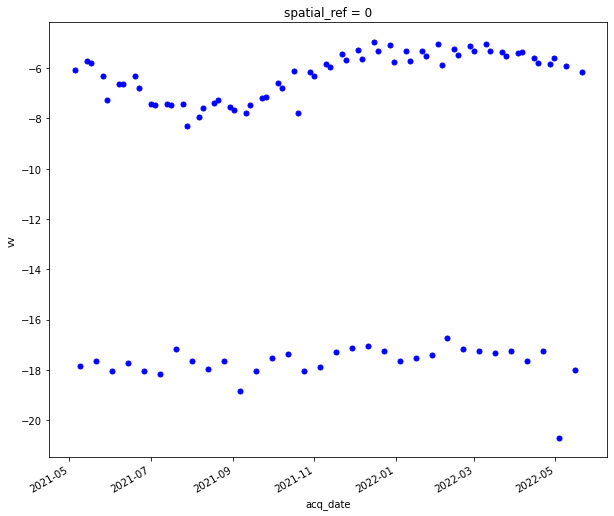

In [73]:
fig, ax = plt.subplots(figsize=(10,8))

power_to_db(asf_subset.vv.mean(dim=['x','y'])).plot(ax=ax, color='blue', linestyle='None', marker='o', markersize=5, label = 'ASF')
power_to_db(pc_subset.sel(band='vv').mean(dim=['x','y'])).plot(ax=ax, color='red', linestyle='None', marker='o', markersize=5, label='PC')

## Dataset comparison

Before we start, let's think about the different aspects of the two datasets that we want to compare, and how we can accomplish this using xarray. Comparing a single time step can be informative, but it doesn't give us a representative idea of how the distributions of the two datasets may be similar or dissimilar. For that, we'd like to perform a **reduction** that let's us view a 

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
power_to_db(asf_clip.vv.mean(dim=['x','y'])).plot(ax=ax, color = 'blue', linestyle='None', marker='o', markersize=5)
power_to_db(da_pc.sel(band='vv').mean(dim=['x','y'])).plot(ax=ax, color='red', linestyle='None', marker='o', markersize=5)